# Vertrauensintervall

Bei der Bestimmung des Verwerfungsbereiches beim $z$-Test, gehen wir vom einem wahren (aber unbekannten) Wert $\mu$ aus und einer bekannten Standardabweichung aus. Dann bestimmen wird das Quartil $q_{0.025}$ und $q_{0.975}$ bei einem zweiseitigen Test und Signifikanzniveau $\alpha=0.05$. 

Wir gehen von einer Normalverteilungskurve $X\sim\mathcal{N}(5,2^2)$ aus. Dann sind die  $q_{0.025}$- und $q_{0.975}$-Quantile 

In [3]:
qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)

[1] 1.080072 8.919928

Unten ist die Normalverteilungskurve mit dem Verwerfungsbereich rot eingezeichnet.

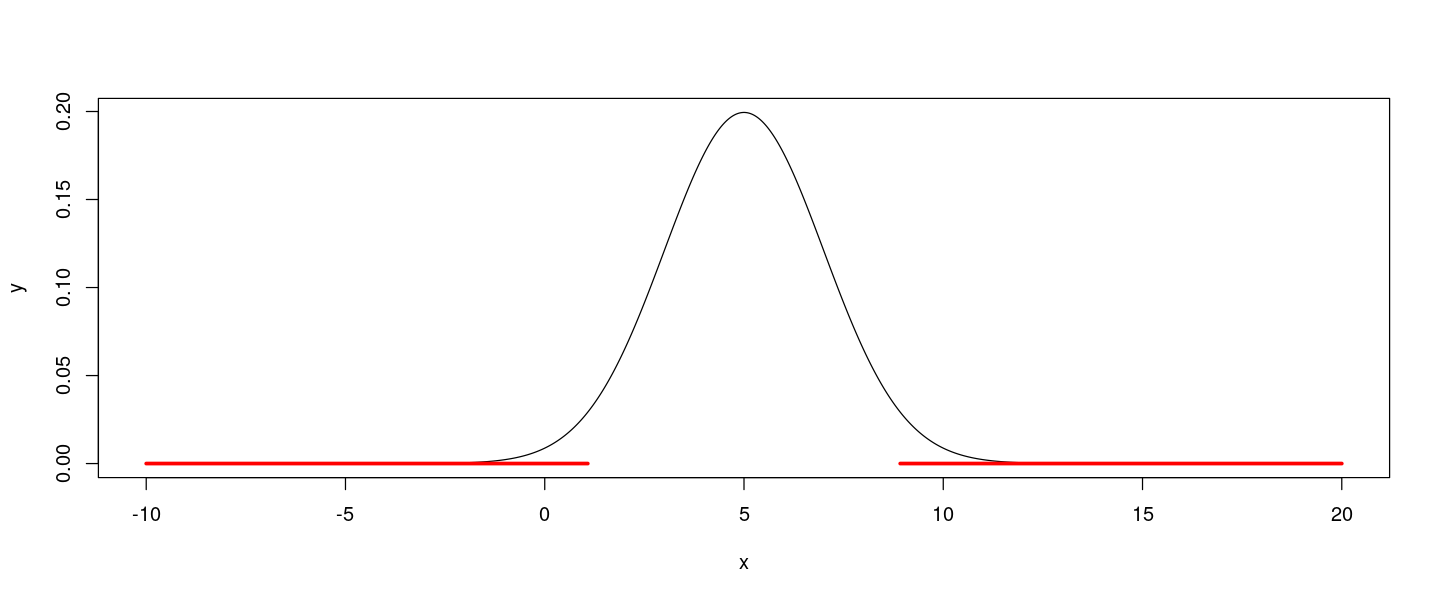

In [4]:
# Dient zu besseren Darstellung der Graphik
library(repr)
options(repr.plot.width=12, repr.plot.height=5)

# Festlegung der Wertebereichs, y-Werte und dem Plot
x <- seq(from = -10, to = 20, by = .01)
y <- dnorm(x, mean = 5, sd = 2)

plot(x, y, type = "l")

# Bestimmung der 0.025- und 0.975-Quantile
q <- qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)

# Einzeichen des Verwerfungsbereichs
# lines() fügt zu einer bestehenden Graphik, der Normalverteilungskurve oben, weitere Linien hinzu
# Der erste Eintrag c(-10, q[1]) legt die x-Koordinaten fest
# Der zweite Eintrag c(0, 0) die zugehörigen y-Koordinaten
lines(c(-10, q[1]), c(0, 0), col = "red", lwd = 3)
lines(c(q[2], 20), c(0, 0), col = "red", lwd = 3)

Liegt nun $\overline{x}_n$ im Verwerfungsbereich (roter Bereich), dann wird die Nullhypothese $H_0$ verworfen. 


Nun ist das wahre $\mu$ praktisch immer unbekannt und für die Bestimmung der Verwerfungsbereiches wurde ein Wert einfach angenommen. Wir können die Frage auch einfach umkehren: Wir kennen $\overline{x}_n$ und fragen uns, für welche $\mu$ wird $H_0$ _nicht_ verworfen.

Dies kann man rechnerisch herleiten, wir machen es hier aber graphisch. Wir gehen zur Veranschaulichung wieder von der Annahme $\mu=5$ aus.

Wir haben nun $\overline{x}_n=6$ gegeben und zeichnen den Verwerfungsbereich ein. In der Skizze unten sind:

- Die dicken roten Linien entsprechen dem Verwerfungsbereich für $\mu=\overline{x}_n=6$. 
- Die dünnen roten Linien entsprechen dem Verwerfungsbereich für $\mu_0=5$.
- Der vertikale schwarze Strich entspricht dem $\mu=\overline{x}_n=6$
- Der vertikale blaue Strich entspricht dem $\mu_0=5$

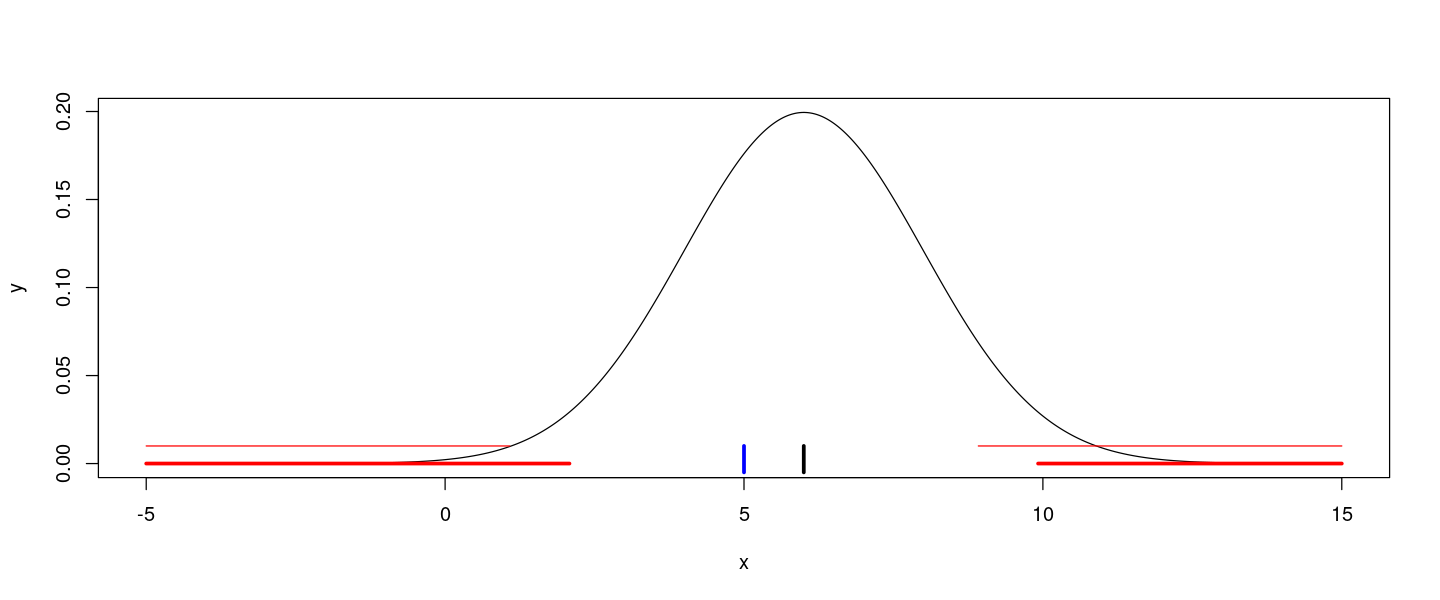

In [5]:
mean = 6 

x_u <- -5
x_o <- 15

x <- seq(from = x_u, to = x_o, by = .01)
y <- dnorm(x, mean = mean, sd = 2)

plot(x, y, type = "l")

q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)

lines(c(x_u, q[1]), c(0, 0), col = "red", lwd = 3)
lines(c(q[2], x_o), c(0, 0), col = "red", lwd = 3)

lines(c(mean, mean), c(-.005, 0.01), lwd = 3)

# Blaue Linie für Nullhypothese 5
lines(c(5, 5), c(-.005, 0.01), col = "blue", lwd = 3)

# Verwerfungsbereich der Nullhypothese
q_n <- qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)
lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 1)
lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 1)

Wir stellen fest, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen. Die Idee ist nun, dass wir $\mu$ vergrössern und $\mu_0=5$ konstant lassen. Dazu definieren wir folgende Funktion vb(), wo jeweils $\mu$ übergeben wird:

In [6]:
vb <- function(mean){
    y <- dnorm(x, mean = mean, sd = 2)
    plot(x, y, type = "l")
    q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)

    lines(c(x_u, q[1]), c(0, 0), col = "red", lwd = 3)
    lines(c(q[2], x_o), c(0, 0), col = "red", lwd = 3)

    lines(c(mean, mean), c(-.005, 0.01), lwd = 3)
    lines(c(5, 5), c(-.005, 0.01), col = "blue", lwd = 3)

    q_n <- qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)
    lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 1)
    lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 1)
}

Wir wählen nun $\mu=7$, dann $\mu=8$ und $\mu=9.5$.

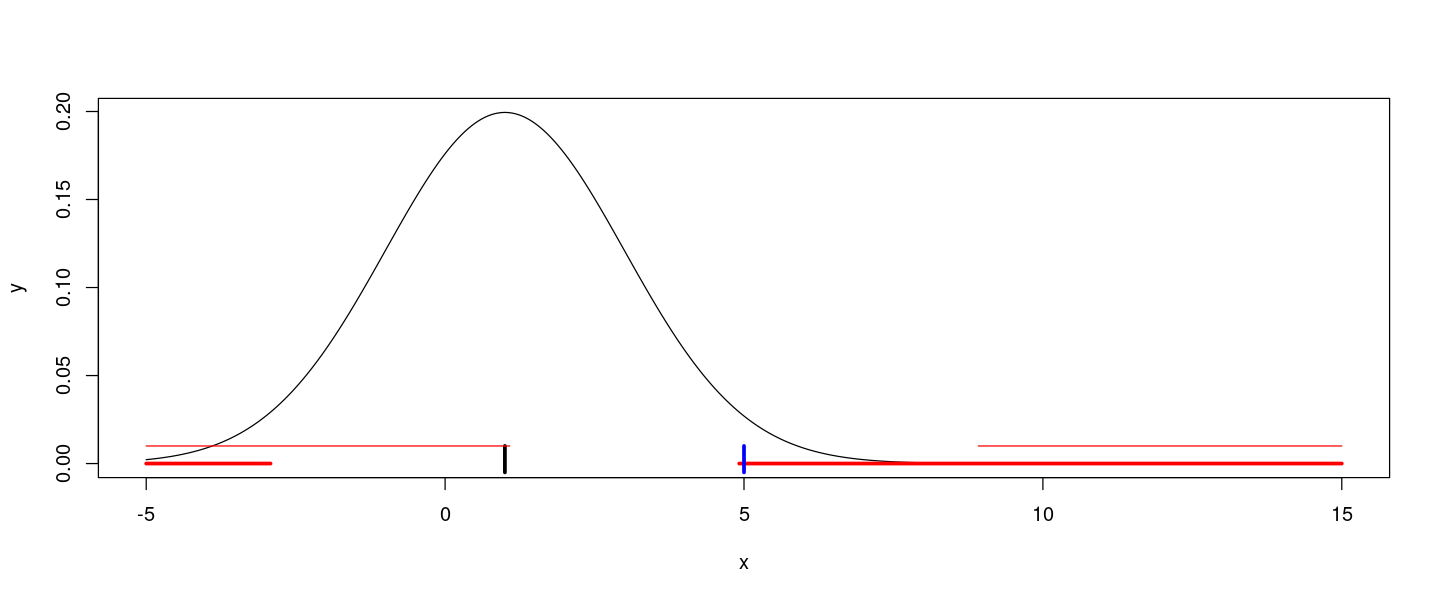

In [19]:
vb(1)

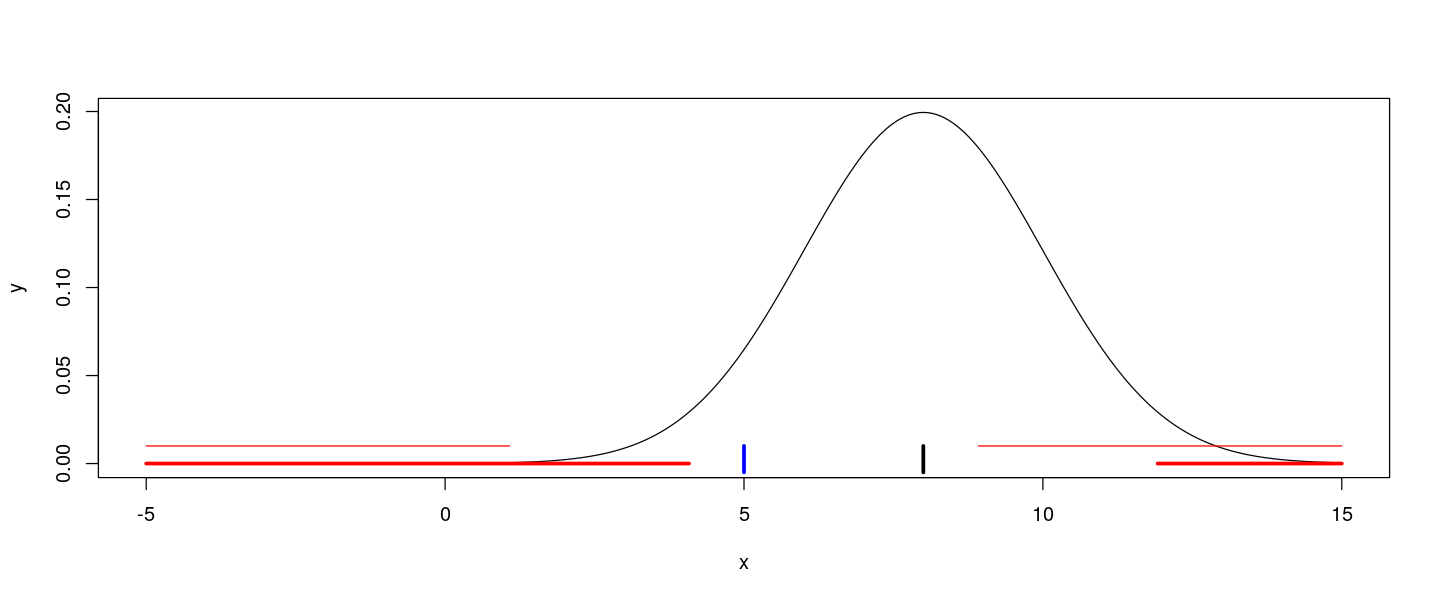

In [151]:
vb(8)

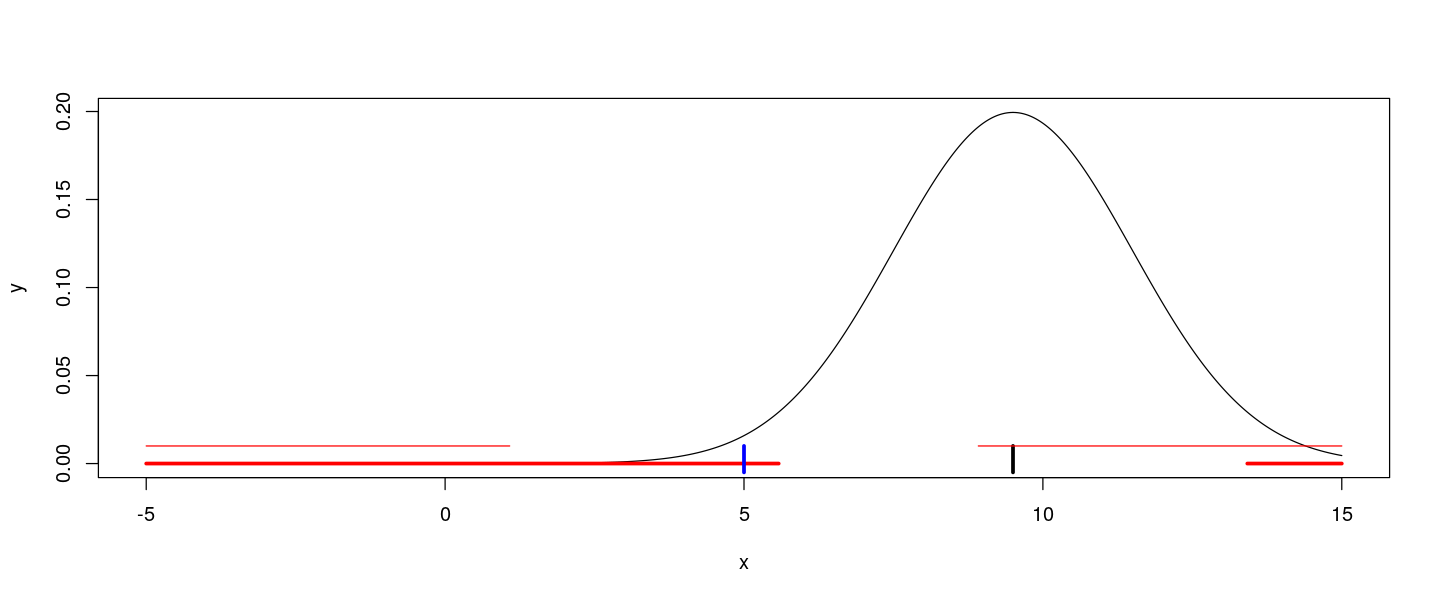

In [152]:
vb(9.5)

Für $\mu=7$ und $\mu=8$ ist die Situation ähnlich wie bei $\mu=7$, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen, also $H_0$ für $\mu_0=5$ _nicht_ verworfen wird.

Die Situation ändert sich für $\mu=9.5$, da liegt dieser Wert (schwarze Linie) im Verwerfungsbereich von $\mu_0=5$ (dünne rote Linien), also wird die Nullhypothese $H_0$ nun verworfen. Auf der anderen Seite liegt nun aber $\mu_0=5$ im Verwerfungsbereich für $\mu=9.5$. 

Wir wollen dies noch anders darstellen. Wir nehmen nicht der Verwerfungsbereich, sondern das was _nicht_ zum Verwerfungsbereich gehört. Der ist unten grün eingezeichnet und diese Intervall heisst _Vertrauensintervall_. 

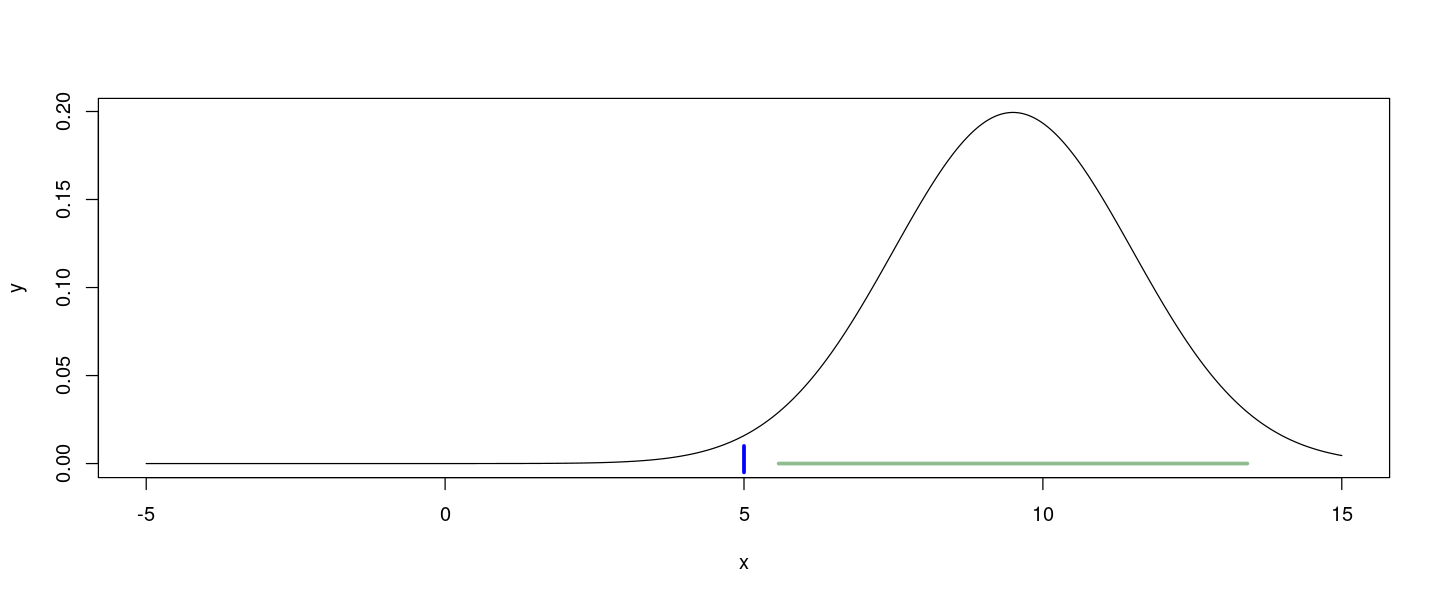

In [20]:
mean = 9.5
y <- dnorm(x, mean = mean, sd = 2)
plot(x, y, type = "l")
q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)

lines(c(q[1], q[2]), c(0, 0), col = "darkseagreen", lwd = 3)
lines(c(5, 5), c(-.005, 0.01), col = "blue", lwd = 3)

Der Wert 5 liegt nicht im Vertrauensintervall:

In [18]:
q

[1]  5.580072 13.419928

Wir haben oben gesehen, dass die Nullhypothese dann verworfen wird. Fällt das wahre $\mu$ also aus dem Vertrauensintervall, dann wird die Nullhypothese verworfen. 

Dies führt uns zu einer weiteren Interpretation des Vertrauensintervalls. Dieses enthält alle $\mu$'s für die Nullhypothese _nicht_ verworfen wird. Es sagt uns also in welchem Intervall sich das wahre $\mu$ befindet. Und wie immer gilt dies nicht absolut, sondern mit einer bestimmten Wahrscheinlichkeit. In diesen Fall liegt das wahre $\mu$ zu 95% im Vertrauensintervall. Wir sprechen deswegen auch von einem 95%-Vertrauensintervall. 

Somit haben wir einen weitere Möglichkeit für einen Testentscheid:
- Liegt $\mu_0$ der Nullhypothese im Vertrauensintervall, so wird die Nullhypothese _nicht_ verworfen. 
- Liegt $\mu_0$ der Nullhypothese _nicht_ im Vertrauensintervall, so wird die Nullhypothese  verworfen.

Hier noch die Funktion vi():

In [21]:
vi <- function(mean)
{
    y <- dnorm(x, mean = mean, sd = 2)
    plot(x, y, type = "l")
    q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)

    lines(c(q[1], q[2]), c(0, 0), col = "darkseagreen", lwd = 3)
    lines(c(5, 5), c(-.005, 0.01), col = "blue", lwd = 3)   
}

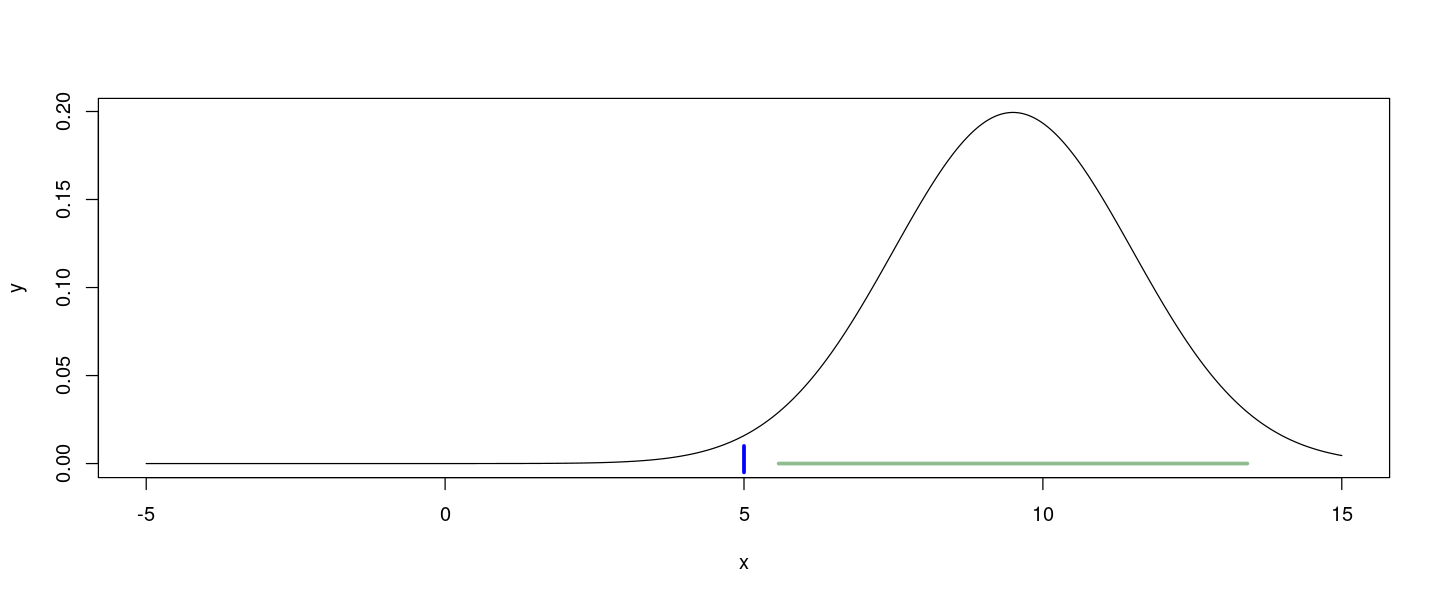

In [24]:
vi(9.5)

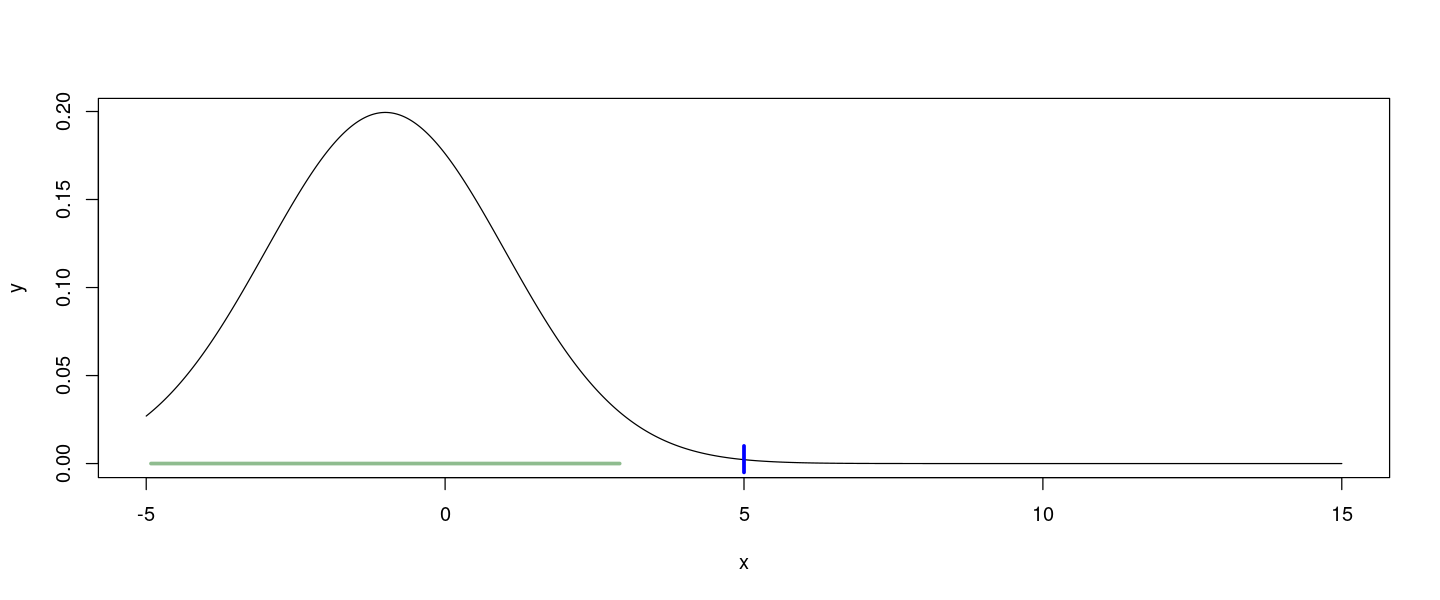

In [23]:
vi(-1)

## Simulation

Wir wählen nun zufällig einen Wert aus $\mathcal{N}(5, 2^2)$ aus und schauen ob dieser Wert im Vertrauensintervall liegt.

In [25]:
set.seed(1)
m <- rnorm(n = 1, mean = 5, sd = 2)
print(m)

q <- qnorm(p = c(0.025, 0.975), mean = m, sd = 2)

cat("Vertrauensintervall \n", q)

[1] 3.747092
Vertrauensintervall 
 -0.1728356 7.66702

Der Wert liegt im Vertrauensintervall. Aber ist dies immer der Fall?

In [26]:
set.seed(7)
m <- rnorm(n = 1, mean = 5, sd = 2)
print(m)
q <- qnorm(p = c(0.025, 0.975), mean = m, sd = 2)
 
cat("Vertrauensintervall \n", q)

[1] 9.574494
Vertrauensintervall 
 5.654566 13.49442

In diesem Fall liegt 5 nicht im Vertrauensintervall. Die Frage ist, wieviele Male dies der Fall ist. Dazu simulieren wir 1000 zufällige Werte aus $\mathcal{N}(5, 2^2)$ und berechnen deren Vertrauensintervall und schauen, ob dieser Wert im Vertrauensintervall liegt oder nicht. 

In [37]:
n <- 1000

r <- rnorm(n = n, mean = 5, sd = 2)
q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

k <- 0

for (i in 1:n){
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
        k <- k+1
    }
}

print(k)

[1] 47


Jedesmal, wenn wir obigen Code ausführen erscheint eine andere Zahl, aber alle sind um die 50 oder 5% von 1000. Oder wir können 100 gleichzeitig ausgeben: 

In [38]:
vi2 <- function(n){
  r <- rnorm(n = n, mean = 5, sd = 2)
  q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
  q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

  k <- 0

  for (i in 1:n){
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
        k <- k+1
    }
}
cat(k," ")  
}

for (i in 1:100){
    vi2(1000)
}

56  48  52  50  66  61  47  51  57  42  49  42  49  54  58  46  55  53  62  39  43  46  49  51  54  43  44  47  48  44  54  60  46  58  41  44  53  39  44  58  42  44  54  52  51  44  48  50  57  44  50  59  38  47  60  44  35  49  50  54  54  50  46  43  34  61  60  56  46  66  41  47  56  47  57  62  45  52  65  50  49  41  49  47  47  52  50  51  37  52  44  45  38  59  41  53  50  46  60  56  

Wir können dies auch noch graphisch machen, aber nur 100 ausgewählten Werten und deren zugehörigen Vertrauensintervallen. Alle roten Intervall enthalten den Wert 5 _nicht_.

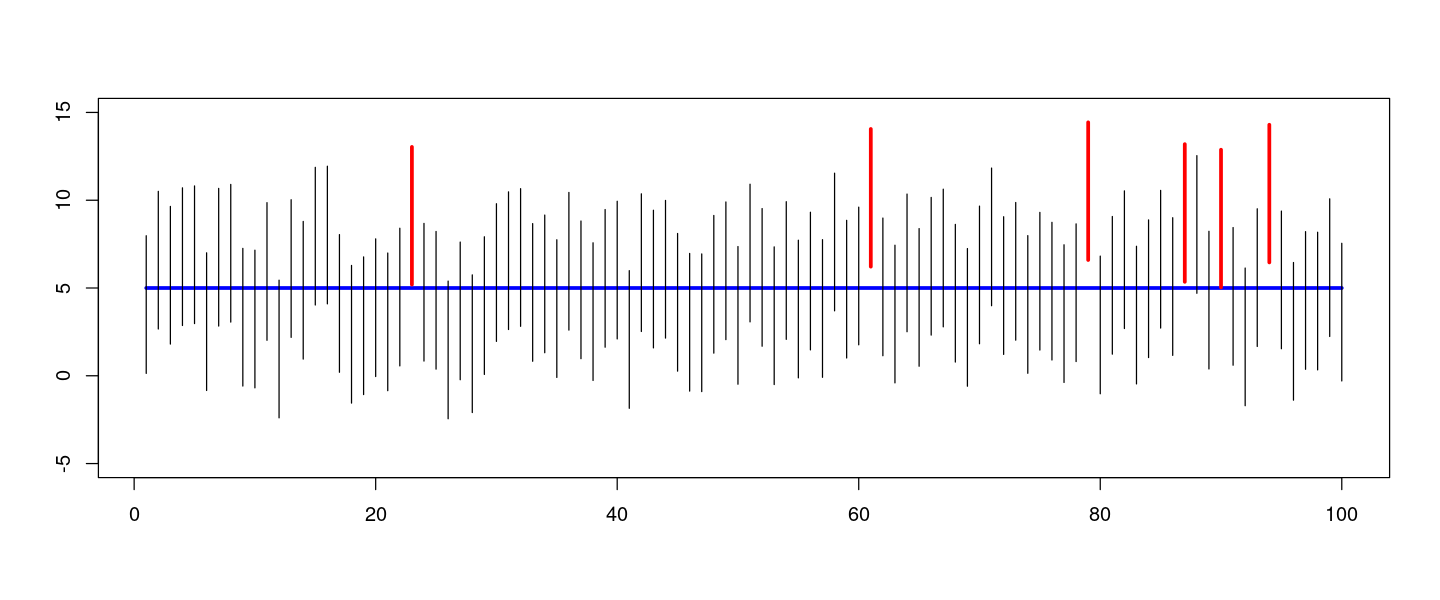

In [43]:
r <- rnorm(n = 100, mean = 5, sd = 2)
q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

plot(NULL, xlim = c(1, 100), ylim = c(-5, 15), xlab = "", ylab = "")

lines(c(1, 100), c(5, 5), lwd = 3, col = "blue")
for (i in 1:100){
    lines(c(i, i), c(q_u[i], q_o[i]))
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
       lines(c(i, i), c(q_u[i], q_o[i]), col = "red", lwd = 3) 
    }
    
}

Auch hier ändern sich bei jedem Durchgang (wegen der Zufälligkeit) die Anzahl der roten Striche, aber es immer um die 5 herum, also 5% von 100.